In [11]:
from sklearn.datasets import fetch_openml
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data
y = mnist.target

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

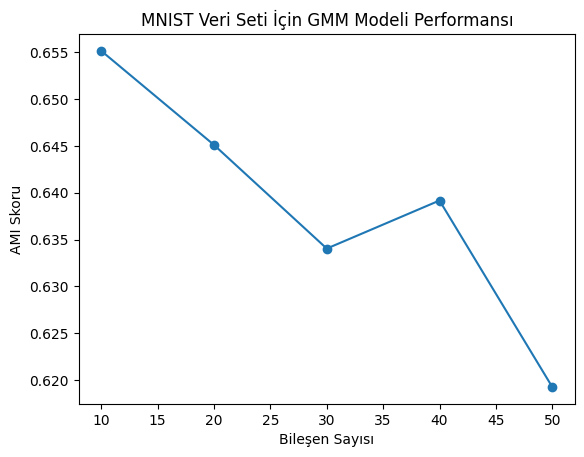

In [13]:
n_components_range = range(10, 60, 10)
ami_scores = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X_pca)
    y_pred = gmm.predict(X_pca)
    ami_scores.append(adjusted_mutual_info_score(y, y_pred))

plt.plot(n_components_range, ami_scores, 'o-')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('AMI Skoru')
plt.title('MNIST Veri Seti İçin GMM Modeli Performansı')
plt.show()

In [14]:

result_df = pd.DataFrame({'Bileşen Sayısı': n_components_range, 'AMI Skoru': ami_scores})
print(result_df)


   Bileşen Sayısı  AMI Skoru
0              10   0.655109
1              20   0.645081
2              30   0.634036
3              40   0.639160
4              50   0.619286


GMM modelindeki bileşen sayısı arttıkça kümeleme performansı azalmaktadır. En yüksek AMI skoru 10 bileşenle elde edilmiştir ve bileşen sayısı arttıkça AMI skoru da düşmektedir. Bu yüzden bu veri seti için en iyi bileşen sayısı 10'dur.